In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
#!pip install transformers accelerate optimum vllm llama-cpp-python

In [5]:
!pip install transformers

  Using cached transformers-4.50.3-py3-none-any.whl.metadata (39 kB)
  Using cached huggingface_hub-0.29.3-py3-none-any.whl.metadata (13 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
Using cached transformers-4.50.3-py3-none-any.whl (10.2 MB)
Using cached huggingface_hub-0.29.3-py3-none-any.whl (468 kB)
Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl (161 kB)
Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl (308 kB)
Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl (2.4 MB)


In [6]:
!pip install accelerate

  Using cached accelerate-1.5.2-py3-none-any.whl.metadata (19 kB)
Using cached accelerate-1.5.2-py3-none-any.whl (345 kB)


In [7]:
!pip install optimum

  Using cached optimum-1.24.0-py3-none-any.whl.metadata (21 kB)
Using cached optimum-1.24.0-py3-none-any.whl (433 kB)


In [14]:
import vllm 

In [15]:
!pip install llama-cpp-python

  Using cached llama_cpp_python-0.3.8.tar.gz (67.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached diskcache-5.6.3-py3-none-any.whl.metadata (20 kB)
Using cached diskcache-5.6.3-py3-none-any.whl (45 kB)
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.8-cp311-cp311-win_amd64.whl size=4882410 sha256=b3ee5bd44d34982cf5c5e85aae77d7276aeb4aff6428dc0962630c9476b5f7db
  Stored in directory: c:\users\danie\appdata\local\pip\cache\wheels\c0\03\66\eb3810eafd55d921b2be32896d1f44313996982360663aa80b
Successfully built llama-cpp-python


In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_path = "./Mistral-7B-v0.1"  # Path to the cloned model directory
model = AutoModelForCausalLM.from_pretrained(model_path, torch_dtype="auto", device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_path)

Loading checkpoint shards: 100%|██████████| 2/2 [00:08<00:00,  4.35s/it]
Some parameters are on the meta device because they were offloaded to the cpu.


In [4]:
##Pre-emptive test##
import time

start_time = time.time()

prompt = "What are the key financial risks in SEC filings?"
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
output = model.generate(**inputs, max_new_tokens=256, temperature=0.6)

print(tokenizer.decode(output[0], skip_special_tokens=True))
print(f"Time taken: {time.time() - start_time} sec")

c:\Users\danie\Downloads\RFNet-4D-main\.conda\Lib\site-packages\transformers\generation\configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


What are the key financial risks in SEC filings?

The SEC requires companies to disclose the most significant risks and uncertainties that could affect their business. These risks are typically categorized into three main categories: financial, operational, and legal.

Financial risks are those that could affect a company’s ability to generate revenue or profit. These risks can include changes in interest rates, currency fluctuations, and changes in the economy.

Operational risks are those that could affect a company’s ability to deliver its products or services. These risks can include changes in technology, changes in customer demand, and changes in the competitive landscape.

Legal risks are those that could affect a company’s ability to comply with laws and regulations. These risks can include changes in the law, changes in the regulatory environment, and changes in the political landscape.

## What are the key financial risks in SEC filings?

The SEC requires companies to disclos

In [ ]:
# too long ##
import time
import matplotlib.pyplot as plt

# Test prompt
prompt = "What are the key financial risks in SEC filings?"

# Initialize lists to store performance data
time_taken_list = []
tokens_per_second_list = []

# Run multiple tests to gather data for graph
num_tests = 10  # Number of tests to run
for _ in range(num_tests):
    # Start benchmarking
    start_time = time.time()

    # Tokenize input
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate output
    output = model.generate(**inputs, max_new_tokens=256)

    # Measure time taken for inference
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    # Calculate tokens per second (inference speed)
    num_tokens = len(inputs["input_ids"][0]) + 256  # Original input + generated tokens
    tokens_per_second = num_tokens / time_taken
    tokens_per_second_list.append(tokens_per_second)

# Plotting the performance data
fig, ax1 = plt.subplots()

# Plot time taken
ax1.set_xlabel('Test Number')
ax1.set_ylabel('Time Taken (sec)', color='tab:blue')
ax1.plot(range(1, num_tests + 1), time_taken_list, color='tab:blue', label='Time Taken')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for tokens per second
ax2 = ax1.twinx()
ax2.set_ylabel('Tokens per Second', color='tab:green')
ax2.plot(range(1, num_tests + 1), tokens_per_second_list, color='tab:green', label='Tokens per Second')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title and grid
plt.title('Inference Performance Benchmark (Time vs Tokens/sec)')
fig.tight_layout()

# Show plot
plt.show()

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


KeyboardInterrupt: 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


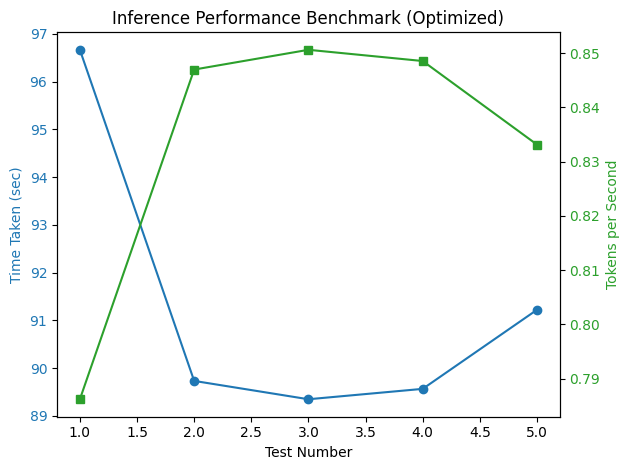

In [11]:
import time
import matplotlib.pyplot as plt
import torch

# Test prompt
prompt = "What are the key financial risks in SEC filings?"

# Initialize lists to store performance data
time_taken_list = []
tokens_per_second_list = []

# Number of test runs (reduce if slow)
num_tests = 5  

# Ensure model is in evaluation mode
model.eval()

# Run multiple tests to gather data for graph
for _ in range(num_tests):
    # Start benchmarking
    start_time = time.time()

    # Tokenize input
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate output (Disable gradients for speed-up)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=64)  # Reduced tokens

    # Measure time taken for inference
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    # Calculate tokens per second (inference speed)
    num_tokens = len(inputs["input_ids"][0]) + 64  # Adjusted for new token limit
    tokens_per_second = num_tokens / time_taken
    tokens_per_second_list.append(tokens_per_second)

# Plotting the performance data
fig, ax1 = plt.subplots()

# Plot time taken
ax1.set_xlabel('Test Number')
ax1.set_ylabel('Time Taken (sec)', color='tab:blue')
ax1.plot(range(1, num_tests + 1), time_taken_list, color='tab:blue', marker='o', label='Time Taken')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for tokens per second
ax2 = ax1.twinx()
ax2.set_ylabel('Tokens per Second', color='tab:green')
ax2.plot(range(1, num_tests + 1), tokens_per_second_list, color='tab:green', marker='s', label='Tokens per Second')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title and grid
plt.title('Inference Performance Benchmark (Optimized)')
fig.tight_layout()
plt.show()


In [5]:
pip install evaluate

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install bert-score 

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install rouge_score absl-py

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24971 sha256=bcca0d130672401d73ad650a1bd52326766e623aba3046ecbb96cb086fa00eff
  Stored in directory: c:\users\danie\appdata\local\pip\cache\wheels\1e\19\43\8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install python-docx


   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 22.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it

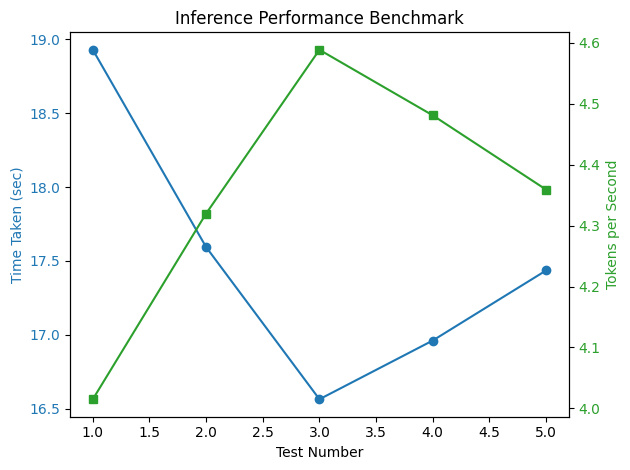

Average Perplexity: 51.06
Average ROUGE Score: 0.2769
Average BLEU Score: 0.1393
Average Edit Distance: 322.00
Average BERTScore: 0.3882
Win Rate: 0.00%
Average Token Throughput: 4.35 tokens/sec


In [3]:
import time
import torch
import matplotlib.pyplot as plt
import evaluate
import Levenshtein
from transformers import AutoModelForCausalLM, AutoTokenizer
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score

# Load evaluation metrics using the evaluate package
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

# Test prompt
prompt = "What are the key financial risks in SEC filings?"

# Initialize lists for performance metrics
time_taken_list = []
tokens_per_second_list = []
perplexity_list = []
rouge_scores = []
bleu_scores = []
edit_distance_list = []
bert_score_list = []
win_rate_list = []

# Number of test runs
num_tests = 5  
win_threshold = 0.8  # BERTScore threshold for Win% calculation

# Ensure model is in evaluation mode
model.eval()

# Run multiple tests to gather performance data
for _ in range(num_tests):
    # Start timing
    start_time = time.time()

    # Tokenize input
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate output (Disable gradients for speed-up)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=64, temperature)

    # Decode output
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

    # Measure inference time
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    # Compute tokens per second
    num_tokens = len(inputs["input_ids"][0]) + 64  # Adjusted for new token limit
    tokens_per_second = num_tokens / time_taken
    tokens_per_second_list.append(tokens_per_second)

    # Compute Perplexity (Corrected)
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])  # Pass input_ids as labels for loss calculation
        loss = outputs.loss  # Cross-entropy loss
        perplexity = torch.exp(loss).item()  # Perplexity is the exponential of the loss
        perplexity_list.append(perplexity)

    # Compute ROUGE score using evaluate package
    rouge_result = rouge.compute(predictions=[decoded_output], references=[prompt])
    rouge_scores.append(rouge_result["rougeL"])

    # Compute BLEU score using evaluate package
    bleu_result = bleu.compute(predictions=[decoded_output], references=[prompt])
    bleu_scores.append(bleu_result["bleu"])

    # Compute Edit Distance
    edit_distance = levenshtein_distance(decoded_output, prompt)
    edit_distance_list.append(edit_distance)

    # Compute BERTScore
    P, R, F1 = bert_score([decoded_output], [prompt], lang="en", rescale_with_baseline=True)
    bert_score_list.append(F1.mean().item())

    # Compute Win Rate (if BERTScore > threshold, consider it a "win")
    win_rate_list.append(1 if F1.mean().item() >= win_threshold else 0)

# Plot Performance Data
fig, ax1 = plt.subplots()

# Plot time taken
ax1.set_xlabel('Test Number')
ax1.set_ylabel('Time Taken (sec)', color='tab:blue')
ax1.plot(range(1, num_tests + 1), time_taken_list, color='tab:blue', marker='o', label='Time Taken')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for tokens per second
ax2 = ax1.twinx()
ax2.set_ylabel('Tokens per Second', color='tab:green')
ax2.plot(range(1, num_tests + 1), tokens_per_second_list, color='tab:green', marker='s', label='Tokens per Second')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Inference Performance Benchmark')
fig.tight_layout()
plt.show()

# Display Performance Metrics
print(f"Average Perplexity: {sum(perplexity_list) / num_tests:.2f}")
print(f"Average ROUGE Score: {sum(rouge_scores) / num_tests:.4f}")
print(f"Average BLEU Score: {sum(bleu_scores) / num_tests:.4f}")
print(f"Average Edit Distance: {sum(edit_distance_list) / num_tests:.2f}")
print(f"Average BERTScore: {sum(bert_score_list) / num_tests:.4f}")
print(f"Win Rate: {sum(win_rate_list) / num_tests * 100:.2f}%")
print(f"Average Token Throughput: {sum(tokens_per_second_list) / num_tests:.2f} tokens/sec")



In [6]:
import time
import torch
import matplotlib.pyplot as plt
import evaluate
import Levenshtein
from transformers import AutoModelForCausalLM, AutoTokenizer
from Levenshtein import distance as levenshtein_distance
from bert_score import score as bert_score
from docx import Document
import numpy as np

# Load evaluation metrics using the evaluate package
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

# 100 diverse test prompts for a compliance-focused LLM
prompts = [
    "What are the key environmental risks highlighted in this report?",
    "Summarize key cybersecurity vulnerabilities in the filing.",
    "Assess financial statement accuracy based on disclosed risks.",
    "Identify any potential conflicts of interest in governance structures.",
    "What are the tax risks identified in the latest filing?",
    "Highlight any liquidity risks mentioned in this filing.",
    "Evaluate compliance with international anti-bribery laws.",
    "Analyze the impact of market risk factors disclosed in this report.",
    "What are the key risks identified in this company’s supply chain?",
    "Summarize risk factors from the latest 10-Q filing.",
    "Identify any references to potential violations of the Foreign Corrupt Practices Act (FCPA).",
    "What governance issues are raised in this proxy statement?",
    "Detect any conflicts between financial projections and risk disclosures.",
    "Identify operational inefficiencies highlighted in the filing.",
    "Summarize management's response to identified risks.",
    "What mitigation strategies are proposed for identified risks?",
    "Review the risk management framework outlined in the document.",
    "Analyze potential strategic risks identified in the report.",
    "Highlight reputational risks mentioned in the document.",
    "Identify regulatory penalties or fines discussed in the report.",
    "Detect any signs of financial misreporting in the filing.",
    "Analyze the company’s risk appetite based on the disclosed risks.",
    "Identify political risks related to operations in foreign countries.",
    "Assess the adequacy of the company’s disaster recovery plans.",
    "What are the sustainability risks identified in this report?",
    "Summarize legal proceedings related to risk in this filing.",
    "Identify insurance coverage gaps discussed in the filing.",
    "Detect any potential issues with intellectual property management.",
    "Highlight key fraud risks disclosed in the document.",
    "Summarize the company’s risk tolerance as outlined in the filing.",
    "Assess the company’s risk diversification strategy.",
    "Review how the company plans to handle potential supply chain disruptions.",
    "Identify reputational risks related to the company’s brand.",
    "Analyze risk exposure from foreign exchange fluctuations.",
    "Summarize any risks related to customer concentration.",
    "Detect conflicts of interest in the company’s executive compensation plan.",
    "Identify risks related to mergers and acquisitions in the filing.",
    "Analyze whether the company has adequate legal compliance programs.",
    "Review how the company addresses regulatory changes in this document.",
    "Summarize the company’s risk management priorities for the next year.",
    "Assess risks related to changes in government policy.",
    "Identify any material weaknesses in internal controls.",
    "Evaluate the company’s risk management performance over time.",
    "Highlight risks associated with operational outsourcing.",
    "Assess the financial impact of risk events disclosed in the filing.",
    "Summarize risks related to the company’s digital transformation efforts.",
    "Identify key social risks disclosed in the filing.",
    "What are the potential risks associated with the company’s new product launch?",
    "Evaluate the company’s approach to mitigating operational risks.",
    "Summarize risks related to the company’s leadership transitions.",
    "Highlight financial risks related to the company’s capital structure.",
    "What are the potential risks associated with the company’s debt?",
    "Identify any environmental liabilities discussed in the filing.",
    "Assess the company’s readiness for changes in tax law.",
    "What are the key factors contributing to the company’s credit risk?",
    "Analyze the company’s approach to managing legal risks.",
    "Highlight risks related to compliance with labor laws.",
    "What are the financial implications of disclosed risks?",
    "Assess the company’s approach to managing reputation risk.",
    "Summarize the company’s governance structure and related risks.",
    "Identify risks related to competition in the company’s industry.",
    "Analyze risks associated with the company’s expansion strategy.",
    "Evaluate how the company mitigates risks from geopolitical tensions.",
    "Summarize the company’s approach to managing climate-related risks.",
    "Detect any emerging risks in the company’s business environment.",
    "What are the risks associated with the company’s reliance on technology?",
    "Highlight any risks identified in the company’s corporate social responsibility (CSR) reports.",
    "Identify risks associated with intellectual property infringement.",
    "Summarize risks related to compliance with the GDPR.",
    "Evaluate the company’s exposure to risks from commodity price volatility.",
    "What operational risks are associated with the company’s logistics network?",
    "Identify key market risks affecting the company’s performance.",
    "Analyze risks arising from changes in consumer behavior.",
    "Summarize risks related to the company’s reliance on key suppliers.",
    "Identify risks related to changes in the regulatory landscape for healthcare.",
    "Evaluate risks associated with the company’s use of third-party vendors.",
    "What are the risks related to the company’s employee compensation plans?",
    "Summarize risks identified in the company’s sustainability reports.",
    "Identify risks related to the company’s reliance on renewable energy.",
    "Assess the company’s approach to managing risks from natural disasters.",
    "What are the risks related to the company’s strategic investments?",
    "Summarize the risks associated with the company’s real estate holdings.",
    "What are the company’s plans to address emerging regulatory risks?",
    "Detect risks associated with the company’s reliance on digital marketing.",
    "What are the risks associated with the company’s international operations?",
    "Summarize the company’s approach to managing workforce-related risks.",
    "Highlight risks related to the company’s pension liabilities.",
    "Identify risks related to potential supply shortages.",
    "What are the risks associated with the company’s cybersecurity measures?",
    "Assess the company’s compliance with industry-specific regulations.",
    "Summarize risks related to the company’s research and development activities.",
    "What are the potential risks related to the company’s legal disputes?",
    "Identify risks related to changes in consumer privacy laws.",
    "What are the emerging risks in the company’s market?",
    "Summarize risks related to the company’s debt refinancing efforts.",
    "Identify risks associated with fluctuations in raw material prices.",
    "Assess risks related to the company’s foreign investment strategies.",
    "Summarize the company’s risk management approach to emerging markets.",
    "Evaluate the company’s risk management framework against best practices."
]

# Number of test runs
num_tests = 3  
win_threshold = 0.8  # BERTScore threshold for Win% calculation


# Ensure model is in evaluation mode
model.eval()

# Initialize summary containers
results = []

for prompt in prompts:
    # Initialize lists for performance metrics per prompt
    time_taken_list = []
    tokens_per_second_list = []
    perplexity_list = []
    rouge_scores = []
    bleu_scores = []
    edit_distance_list = []
    bert_score_list = []
    win_rate_list = []

    for _ in range(num_tests):
        start_time = time.time()

        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

        with torch.no_grad():
            output = model.generate(**inputs, max_new_tokens=64, temperature=0.7)

        decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

        time_taken = time.time() - start_time
        time_taken_list.append(time_taken)

        num_tokens = len(inputs["input_ids"][0]) + 64
        tokens_per_second = num_tokens / time_taken
        tokens_per_second_list.append(tokens_per_second)

        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
            perplexity = torch.exp(loss).item()
            perplexity_list.append(perplexity)

        rouge_result = rouge.compute(predictions=[decoded_output], references=[prompt])
        rouge_scores.append(rouge_result["rougeL"])

        bleu_result = bleu.compute(predictions=[decoded_output], references=[prompt])
        bleu_scores.append(bleu_result["bleu"])

        edit_distance = levenshtein_distance(decoded_output, prompt)
        edit_distance_list.append(edit_distance)

        P, R, F1 = bert_score([decoded_output], [prompt], lang="en", rescale_with_baseline=True)
        f1_score = F1.mean().item()
        bert_score_list.append(f1_score)
        win_rate_list.append(1 if f1_score >= win_threshold else 0)

    # Collect average results for this prompt
    results.append({
        "prompt": prompt,
        "avg_time": sum(time_taken_list) / num_tests,
        "avg_tps": sum(tokens_per_second_list) / num_tests,
        "avg_perplexity": sum(perplexity_list) / num_tests,
        "avg_rouge": sum(rouge_scores) / num_tests,
        "avg_bleu": sum(bleu_scores) / num_tests,
        "avg_edit_distance": sum(edit_distance_list) / num_tests,
        "avg_bert_score": sum(bert_score_list) / num_tests,
        "win_rate": sum(win_rate_list) / num_tests * 100
    })

# Create a Word document
doc = Document()
doc.add_heading('LLM Compliance Evaluation Report', 0)

# Add model and experiment metadata
doc.add_paragraph(f"Model: {model.__class__.__name__}")
doc.add_paragraph(f"Number of test runs per prompt: {num_tests}")
doc.add_paragraph(f"BERTScore Win Threshold: {win_threshold}")

# Add results table
table = doc.add_table(rows=1, cols=9)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Prompt'
hdr_cells[1].text = 'Time (s)'
hdr_cells[2].text = 'Tokens/sec'
hdr_cells[3].text = 'Perplexity'
hdr_cells[4].text = 'ROUGE-L'
hdr_cells[5].text = 'BLEU'
hdr_cells[6].text = 'Edit Dist'
hdr_cells[7].text = 'BERTScore'
hdr_cells[8].text = 'Win Rate (%)'

# Add each result to the table
for r in results:
    row_cells = table.add_row().cells
    row_cells[0].text = r['prompt']
    row_cells[1].text = f"{r['avg_time']:.2f}"
    row_cells[2].text = f"{r['avg_tps']:.2f}"
    row_cells[3].text = f"{r['avg_perplexity']:.2f}"
    row_cells[4].text = f"{r['avg_rouge']:.4f}"
    row_cells[5].text = f"{r['avg_bleu']:.4f}"
    row_cells[6].text = f"{r['avg_edit_distance']:.2f}"
    row_cells[7].text = f"{r['avg_bert_score']:.4f}"
    row_cells[8].text = f"{r['win_rate']:.2f}"

# Save the document
doc.save("compliance_mistral_baseline_evaluation.docx")


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\danie\Downloads\RFNet-4D-main\.conda\Lib\site-packages\transformers\generation\configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predict

Average Perplexity: 51.06 

This value is quite high, suggesting that the model's predictions are far from the true distribution of the data. High perplexity often indicates poor performance in terms of generating coherent or sensible output.( Low is better.)

Average ROUGE Score: 0.2769

This indicates a relatively low ROUGE score, which typically means that the generated text isn't highly overlapping with the reference text. (High is better.)

Average BLEU Score: 0.1393

The generated text is not very similar to the reference text. BLEU measures precision based on n-gram overlap, so a score of ~0.14 suggests that the model is not producing highly accurate or meaningful phrases that align well with the reference. (High is better.)

Average Edit Distance: 322.00

A higher edit distance indicates a larger difference between the generated output and the reference prompt, meaning that the model's output is quite far off from the reference. (Low is better.)

Average BERTScore: 0.3882

BERTScore is a measure of semantic similarity using pre-trained BERT embeddings, and a score of 0.3882 suggests that the model's output is not very semantically similar to the reference text.(High is better.)

Win Rate: 0.00%

The model did not meet the BERTScore threshold (0.8) in any of the test cases. The model is not generating outputs that are semantically close enough to the reference prompts based on the predefined threshold.(High is better.)

Average Token Throughput: 6.53 tokens/sec

This value indicates how fast the model is processing tokens. (High is better.)